**Import Libraries**

In [95]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

**Access Datasets**

In [96]:
# Read csvs 
sales = pd.read_csv('sales.csv')
products = pd.read_csv('products.csv')
purchases = pd.read_csv('purchases.csv')
expenses = pd.read_csv('expenses.csv')
branch_expenses = pd.read_csv('branch_expenses.csv')
salaries = pd.read_csv('salaries.csv')
ccr_sales = pd.read_csv('ccr_sales.csv')

# Clean and convert 'SALARY'
salaries['SALARY'] = salaries['SALARY'].astype(str).str.replace(',', '')
salaries['SALARY'] = pd.to_numeric(salaries['SALARY'], errors='coerce')


# put them in an array
data = [sales, products, purchases, expenses]

sales.head(5)


,Action,Date,Invoice No.,Customer name,Contact Number,Location,Payment Status,Payment Method,Total amount,Total Amount,Total paid,Total Paid,Sell Due,Sell Return Due,Shipping Status,Total Items,Added By,Sell note,Staff note,Shipping Details
0,ActionsToggle Dropdown ...,30/04/2025,ALV2- 0886,UKAEGBU STELLA,36,ALVAN 2 CONNECT POINT,Paid,Cash,"₦ 17,000.000","17,000.00","₦ 17,000.000","17,000.00",₦ 0.000,NaN,NaN,5,UKAEGBU STELLA,NaN,NaN,NaN
1,ActionsToggle Dropdown ...,30/04/2025,ULA- 1935,CECELIA OHAJIMKPO,19,ULAKWO CONNECT POINT,Paid,Cash,"₦ 7,300.000","7,300.00","₦ 7,300.000","7,300.00",₦ 0.000,NaN,NaN,1,Cecelia Ohajimkpo,NaN,NaN,NaN
2,ActionsToggle Dropdown ...,30/04/2025,OAN- 1031,MR ARINZE ADOKE,55664477,OANDO CONNECT POINT,Paid,Cash,"₦ 21,800.000","21,800.00","₦ 21,800.000","21,800.00",₦ 0.000,NaN,NaN,5,MR ARINZE ADOKE,NaN,NaN,NaN
3,ActionsToggle Dropdown ...,30/04/2025,ONT2- 2153,DIKE CHIBUZOR,30,ONITSHA 2 CONNECT LITE,Paid,Cash,"₦ 11,600.000","11,600.00","₦ 11,600.000","11,600.00",₦ 0.000,NaN,NaN,4,DIKE CHIBUZOR,NaN,NaN,NaN
4,ActionsToggle Dropdown ...,30/04/2025,ELE- 0547,EMMANUEL EGBEIGWE,7,ELELE CONNECT POINT,Paid,Cash,"₦ 28,800.000","28,800.00","₦ 28,800.000","28,800.00",₦ 0.000,NaN,NaN,5,EMMANUEL EGBEIGWE,NaN,NaN,NaN


**Data Preprocessing**

In [126]:
# Force pandas to display full width
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)


In [98]:
for csv in data:
    # Remove 'Action' column
    if 'Action' in csv.columns:
        csv.drop(columns=['Action'], inplace=True)
        
    if 'Total amount' in csv.columns:
        csv.drop(columns=['Total amount'], inplace=True)
        
    if 'Total paid' in csv.columns:
        csv.drop(columns=['Total paid'], inplace=True)
    
    # Remove rows like 'Total:' and clean the Date column
    if 'Date' in csv.columns:
        # Remove rows where 'Date' contains non-date strings
        csv = csv[csv['Date'].str.contains(r"\d{2}/\d{2}/\d{4}", na=False)]

        # Now convert to datetime
        csv['Date'] = pd.to_datetime(csv['Date'], format="%d/%m/%Y").dt.date
 

In [99]:
delete_purchases = ['Grand Total']
purchases.head(5)


,Date,Reference No,Location,Supplier,Purchase Status,Payment Status,Grand Total,Total Amount,Payment due,Added By
0,30/04/2025,1026501,ALAKAHIA CONNECT / LITE,"MTN HYCONNECT CONNECTION ALAKAHIA,",Received,Due,"₦ 413,999.977","413,999.98","Purchase: ₦ 413,999.977",Mrs Gloria Dennis
1,30/04/2025,EXT.CUSTOMER MOMO HEAD C/O CHIOMA CASH FLOAT P...,HEAD OFFICE,"CEO MOMO HEAD OFFICE,",Received,Paid,"₦ 5,000.000","5,000.00",Purchase: ₦ 0.000,AMARA IHEJIRIKA
2,30/04/2025,ONITSHA 2 MOMO HEAD CASH PURCHASE 566,ONITSHA 2 CONNECT LITE,"CEO MOMO HEAD OFFICE,",Received,Paid,"₦ 1,000,000.000","1,000,000.00",Purchase: ₦ 0.000,MR DARLINGTON IHEANACHO
3,30/04/2025,EBU AWKA MOMO HEAD OFFICE CASH PURCHASE 26133,EBU AWKA,"CEO MOMO HEAD OFFICE,",Received,Paid,"₦ 100,000.000","100,000.00",Purchase: ₦ 0.000,MR DARLINGTON IHEANACHO
4,29/04/2025,SOA ORDER RECPT LOG. VIA LOY CODE C1025938,AWKA CONNECT / LITE,"MTN HYCONNECT CONNECTION AWKA,",Received,Paid,"₦ 1,490,941.185","1,490,941.19",Purchase: ₦ 0.000,VINA NWOSU


In [100]:
# Delete columns that are not needed
delete_sales = ['Sell note', 'Staff note', 'Sell Due', 'Shipping Details', 'Sell Return Due', 'Shipping Status']
for column in delete_sales:
    if column in sales.columns:
        sales.drop(columns=column, inplace=True)



In [101]:
sales.head(5)

,Date,Invoice No.,Customer name,Contact Number,Location,Payment Status,Payment Method,Total Amount,Total Paid,Total Items,Added By
0,30/04/2025,ALV2- 0886,UKAEGBU STELLA,36,ALVAN 2 CONNECT POINT,Paid,Cash,"17,000.00","17,000.00",5,UKAEGBU STELLA
1,30/04/2025,ULA- 1935,CECELIA OHAJIMKPO,19,ULAKWO CONNECT POINT,Paid,Cash,"7,300.00","7,300.00",1,Cecelia Ohajimkpo
2,30/04/2025,OAN- 1031,MR ARINZE ADOKE,55664477,OANDO CONNECT POINT,Paid,Cash,"21,800.00","21,800.00",5,MR ARINZE ADOKE
3,30/04/2025,ONT2- 2153,DIKE CHIBUZOR,30,ONITSHA 2 CONNECT LITE,Paid,Cash,"11,600.00","11,600.00",4,DIKE CHIBUZOR
4,30/04/2025,ELE- 0547,EMMANUEL EGBEIGWE,7,ELELE CONNECT POINT,Paid,Cash,"28,800.00","28,800.00",5,EMMANUEL EGBEIGWE


In [102]:
expenses.head(5)


,Date,Reference No,Recurring details,Expense Category,Sub category,Location,Payment Status,Tax,Total Amount,Payment due,Expense for,Contact,Expense note,Added By
0,02/04/2025,SANTANA SEC SALARIES MAR. 25,NaN,SALARY/WAGES,NaN,ALAKAHIA CONNECT / LITE,Paid,NaN,"120,000.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,SANTANA SEC SALARIES MAR. 25,MR DARLINGTON IHEANACHO
1,02/04/2025,RAYNEE TECH.SERVICE SALARIES MAR.25,NaN,SALARY/WAGES,NaN,HEAD OFFICE,Paid,NaN,"200,000.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,RAYNEE TECH.SERVICE SALARIES MAR.25,MR DARLINGTON IHEANACHO
2,02/04/2025,ONITSHA 2 SALARIES MAR.25,NaN,SALARY/WAGES,NaN,ONITSHA 2 CONNECT LITE,Paid,NaN,"800,500.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,ONITSHA 2 SALARIES MAR.25,MR DARLINGTON IHEANACHO
3,02/04/2025,OK-HUB SALARIES MAR.25,NaN,SALARY/WAGES,NaN,OKIGWE HUB,Paid,NaN,"120,000.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,OK-HUB SALARIES MAR.25,MR DARLINGTON IHEANACHO
4,02/04/2025,AWKA SALARIES MAR.25,NaN,SALARY/WAGES,NaN,AWKA CONNECT / LITE,Paid,NaN,"891,500.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,AWKA SALARIES MAR.25,MR DARLINGTON IHEANACHO


In [103]:
products.head(5)

,SKU,Product,Variation,Category,Location,Unit Selling Price,Current stock,Current Stock Value (By purchase price),Current Stock Value (By sale price),Potential profit,Total unit sold,Total Unit Transfered,Total Unit Adjusted,Custom Field1,Custom Field2,Custom Field3,Custom Field4
0,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,OWERRI 2 CONNECT / LITE,"₦ 80,000.000 View group prices",1.0 UNIT(S),"₦ 73,599.995","₦ 80,000.000","₦ 6,400.005",108.0 UNIT(S),1.0 UNIT(S),0.0 UNIT(S),NaN,NaN,NaN,NaN
1,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,ALAKAHIA CONNECT / LITE,"₦ 80,000.000 View group prices",0.0 UNIT(S),"₦ 1,692,799.544",₦ 0.000,"₦ -1,692,799.544",189.0 UNIT(S),7.0 UNIT(S),0.0 UNIT(S),NaN,NaN,NaN,NaN
2,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,ALVAN 2 CONNECT POINT,"₦ 80,000.000 View group prices",0.0 UNIT(S),₦ 0.000,₦ 0.000,₦ 0.000,1.0 UNIT(S),0.0 UNIT(S),0.0 UNIT(S),NaN,NaN,NaN,NaN
3,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,HEAD OFFICE,"₦ 80,000.000 View group prices",0.0 UNIT(S),₦ 0.000,₦ 0.000,₦ 0.000,0.0 UNIT(S),18.0 UNIT(S),0.0 UNIT(S),NaN,NaN,NaN,NaN
4,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,ASABA INPLANT,"₦ 80,000.000 View group prices",0.0 UNIT(S),₦ 0.000,₦ 0.000,₦ 0.000,14.0 UNIT(S),0.0 UNIT(S),0.0 UNIT(S),NaN,NaN,NaN,NaN


In [104]:
products_num_cols = ["Unit Selling Price","Current stock","Current Stock Value (By purchase price)",
                     "Current Stock Value (By sale price)",
                     "Potential profit","Total unit sold","Total Unit Transfered", "Total Unit Adjusted"] 

#remove any character that is not a number
for column in products.columns:
    if column in products_num_cols:
        products[column] = products[column].replace(r'[^0-9.]+', '', regex=True)
        
# Convert to numeric
for column in products_num_cols:
    products[column] = pd.to_numeric(products[column], errors='coerce')

products.head(5)


,SKU,Product,Variation,Category,Location,Unit Selling Price,Current stock,Current Stock Value (By purchase price),Current Stock Value (By sale price),Potential profit,Total unit sold,Total Unit Transfered,Total Unit Adjusted,Custom Field1,Custom Field2,Custom Field3,Custom Field4
0,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,OWERRI 2 CONNECT / LITE,"80,000.00",1.00,"73,599.99","80,000.00","6,400.01",108.00,1.00,0.00,NaN,NaN,NaN,NaN
1,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,ALAKAHIA CONNECT / LITE,"80,000.00",0.00,"1,692,799.54",0.00,"1,692,799.54",189.00,7.00,0.00,NaN,NaN,NaN,NaN
2,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,ALVAN 2 CONNECT POINT,"80,000.00",0.00,0.00,0.00,0.00,1.00,0.00,0.00,NaN,NaN,NaN,NaN
3,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,HEAD OFFICE,"80,000.00",0.00,0.00,0.00,0.00,0.00,18.00,0.00,NaN,NaN,NaN,NaN
4,120329,MTN 5G HYNET FLEX,NaN,ACCESSORIES,ASABA INPLANT,"80,000.00",0.00,0.00,0.00,0.00,14.00,0.00,0.00,NaN,NaN,NaN,NaN


In [105]:

# Remove 'CONNECT POINT' and 'CONNECT / LITE' from the values in Location column
# Clean the phrases
expenses['Location'] = expenses['Location'].str.replace(r'CONNECT POINT|CONNECT\s*/\s*LITE|CONNECT LITE', '', regex=True)
products['Location'] = products['Location'].str.replace(r'CONNECT POINT|CONNECT\s*/\s*LITE|CONNECT LITE', '', regex=True)
sales['Location'] = sales['Location'].str.replace(r'CONNECT POINT|CONNECT\s*/\s*LITE|CONNECT LITE', '', regex=True)
sales['Location'] = sales['Location'].str.strip()
# Clean and convert 'SALARY'
salaries['SALARY'] = salaries['SALARY'].astype(str).str.replace(',', '')
salaries['SALARY'] = pd.to_numeric(salaries['SALARY'], errors='coerce')

# Strip extra spaces
expenses['Location'] = expenses['Location'].str.strip()

expenses.head(5)


,Date,Reference No,Recurring details,Expense Category,Sub category,Location,Payment Status,Tax,Total Amount,Payment due,Expense for,Contact,Expense note,Added By
0,02/04/2025,SANTANA SEC SALARIES MAR. 25,NaN,SALARY/WAGES,NaN,ALAKAHIA,Paid,NaN,"120,000.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,SANTANA SEC SALARIES MAR. 25,MR DARLINGTON IHEANACHO
1,02/04/2025,RAYNEE TECH.SERVICE SALARIES MAR.25,NaN,SALARY/WAGES,NaN,HEAD OFFICE,Paid,NaN,"200,000.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,RAYNEE TECH.SERVICE SALARIES MAR.25,MR DARLINGTON IHEANACHO
2,02/04/2025,ONITSHA 2 SALARIES MAR.25,NaN,SALARY/WAGES,NaN,ONITSHA 2,Paid,NaN,"800,500.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,ONITSHA 2 SALARIES MAR.25,MR DARLINGTON IHEANACHO
3,02/04/2025,OK-HUB SALARIES MAR.25,NaN,SALARY/WAGES,NaN,OKIGWE HUB,Paid,NaN,"120,000.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,OK-HUB SALARIES MAR.25,MR DARLINGTON IHEANACHO
4,02/04/2025,AWKA SALARIES MAR.25,NaN,SALARY/WAGES,NaN,AWKA,Paid,NaN,"891,500.00",₦ 0.000,MR CHARLES,MR CHARLES OKEKE OKEKE,AWKA SALARIES MAR.25,MR DARLINGTON IHEANACHO


**Information Extraction and Visualisation**

In [106]:
# Ensure numeric values
expenses['Total Amount'] = expenses['Total Amount'].replace(r'[^0-9.]+', '', regex=True)
expenses['Total Amount'] = pd.to_numeric(expenses['Total Amount'], errors='coerce')

# 1. Total Expenses per Location
expenses_total = expenses.groupby('Location')['Total Amount'].sum().reset_index()
expenses_total.rename(columns={'Total Amount': 'Total Expenses'}, inplace=True)

# 2. Total Combined Expenses (Company-wide)
total_expenses_sum = expenses_total['Total Expenses'].sum()

# Output
print(expenses_total.head(10))
print(f"Total Combined Expenses: {total_expenses_sum}")


      Location  Total Expenses
0      AIRPORT      726,000.00
1     ALAKAHIA    2,136,900.00
2      ALVAN 1       37,600.00
3      ALVAN 2       14,500.00
4         AWKA    4,195,800.00
5        ELELE      350,300.00
6  HEAD OFFICE   10,378,893.73
7     IGBARIAM      100,000.00
8     IGWURUTA      110,000.00
9       IHIALA      299,850.00
Total Combined Expenses: 24530643.73


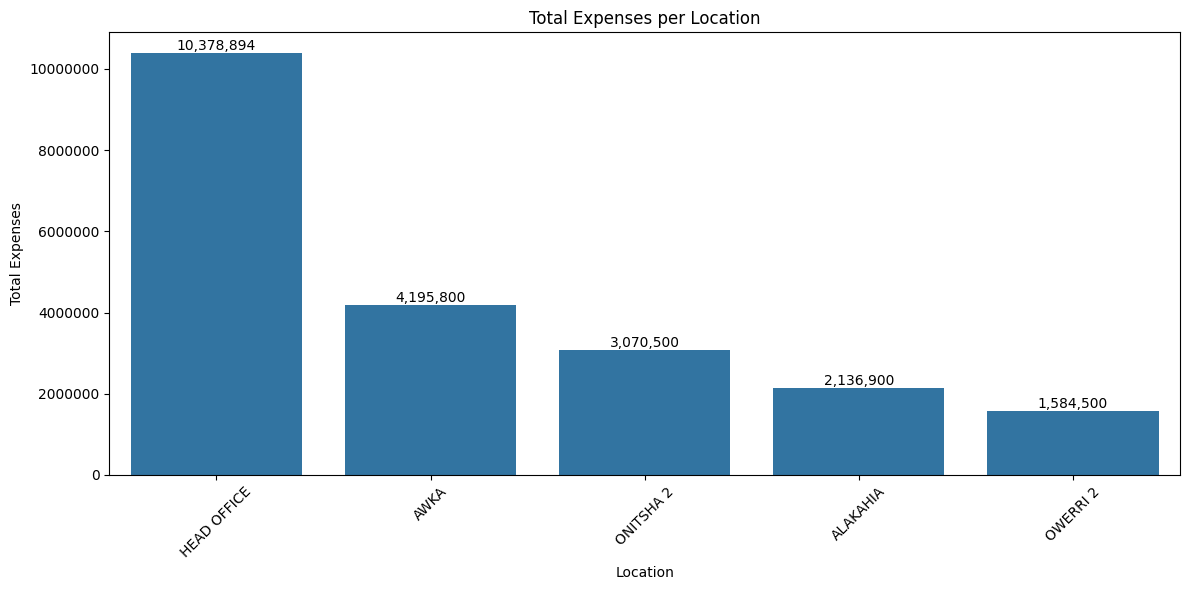

In [107]:
top5expenses = expenses_total.nlargest(5, 'Total Expenses')

# Plotting Total Expenses per Location
plt.figure(figsize=(12, 6))
sns.barplot(data=top5expenses, x='Location', y='Total Expenses', hue_order='viridis')
for index, value in enumerate(top5expenses['Total Expenses']):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title('Total Expenses per Location')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Location')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cleaned/total_expenses_per_location.png')
plt.show()

In [108]:
# Ensure numeric values are cleaned
expenses['Total Amount'] = expenses['Total Amount'].replace(r'[^0-9.]+', '', regex=True)
expenses['Total Amount'] = pd.to_numeric(expenses['Total Amount'], errors='coerce')

# Group by Expense Category
category_total = expenses.groupby('Expense Category')['Total Amount'].sum().reset_index()

# Rename for clarity
category_total.rename(columns={'Total Amount': 'Category Total'}, inplace=True)

# Sort by highest spending
category_total = category_total.sort_values(by='Category Total', ascending=False)

# Output
print(category_total.head(10))  # top 10 categories


        Expense Category  Category Total
11          SALARY/WAGES   16,832,912.00
7           MISCELLENOUS    2,442,400.00
5                IMPREST    1,961,150.00
9                   RENT    1,022,800.00
10               REPAIRS      598,500.00
4          FUEL / DESIEL      465,000.00
2         CEO'S EXPENSES      313,200.00
1   BANK SERVICE CHARGES      306,581.73
8       OFFICE EQUIPMENT      255,500.00
6     INCENTIVES / BONUS      200,000.00


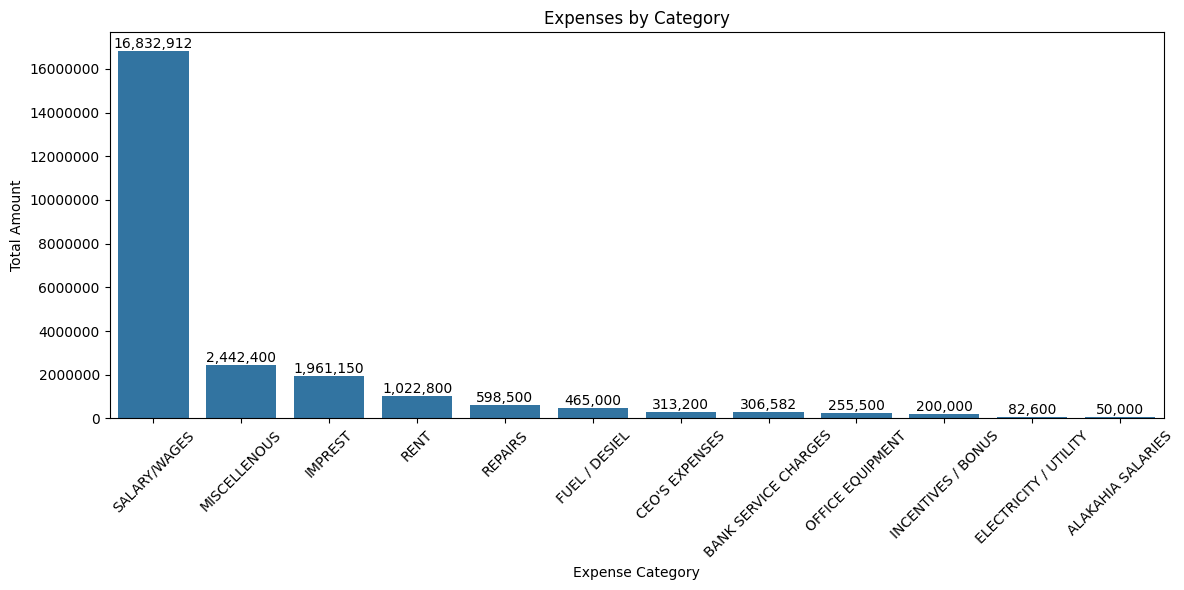

In [109]:
# Top 5 Expense Categories
top5categories = category_total.nlargest(5, 'Category Total')

# Plotting Expenses by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_total, x='Expense Category', y ='Category Total', hue_order='viridis')
for index, value in enumerate(category_total['Category Total']):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title('Expenses by Category')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Expense Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/expenses_by_category.png')
plt.show()


In [110]:
# Clean the 'Current Stock Value (By sale price)' column
products['Current Stock Value (By sale price)'] = products['Current Stock Value (By sale price)'].replace(r'[^0-9.]+', '', regex=True)
products['Current Stock Value (By sale price)'] = pd.to_numeric(products['Current Stock Value (By sale price)'], errors='coerce')

# 1. Total Expected Revenue (company-wide)
total_revenue = products['Current Stock Value (By sale price)'].sum()

# 2. Expected Revenue per Location
revenue_per_location = products.groupby('Location')['Current Stock Value (By sale price)'].sum().reset_index()

# Rename column for clarity
revenue_per_location.rename(columns={'Current Stock Value (By sale price)': 'Expected Revenue'}, inplace=True)

# Output
print("Total Expected Revenue:", total_revenue)
print(revenue_per_location.head())


Total Expected Revenue: 163164808.6
        Location  Expected Revenue
0       AIRPORT      11,546,814.70
1      ALAKAHIA      18,828,600.00
2       ALVAN 1         978,750.00
3       ALVAN 2          80,000.00
4  ASABA INPLANT              0.00


In [111]:
# Total Potential Profit and Potential Profit per Location 
# Clean 'Potential profit' column if needed
products['Potential profit'] = products['Potential profit'].replace(r'[^0-9.]+', '', regex=True)
products['Potential profit'] = pd.to_numeric(products['Potential profit'], errors='coerce')

# 1. Total Potential Profit (overall)
total_profit = products['Potential profit'].sum()

# 2. Potential Profit per Location
profit_per_location = products.groupby('Location')['Potential profit'].sum().reset_index()

# Rename column for clarity
profit_per_location.rename(columns={'Potential profit': 'Total Potential Profit'}, inplace=True)

# Print results
print("Total Potential Profit:", total_profit)
print(profit_per_location.head())

Total Potential Profit: 8367407.9
        Location  Total Potential Profit
0       AIRPORT               419,766.45
1      ALAKAHIA             4,485,255.80
2       ALVAN 1                67,653.63
3       ALVAN 2                 4,494.34
4  ASABA INPLANT               11,250.05


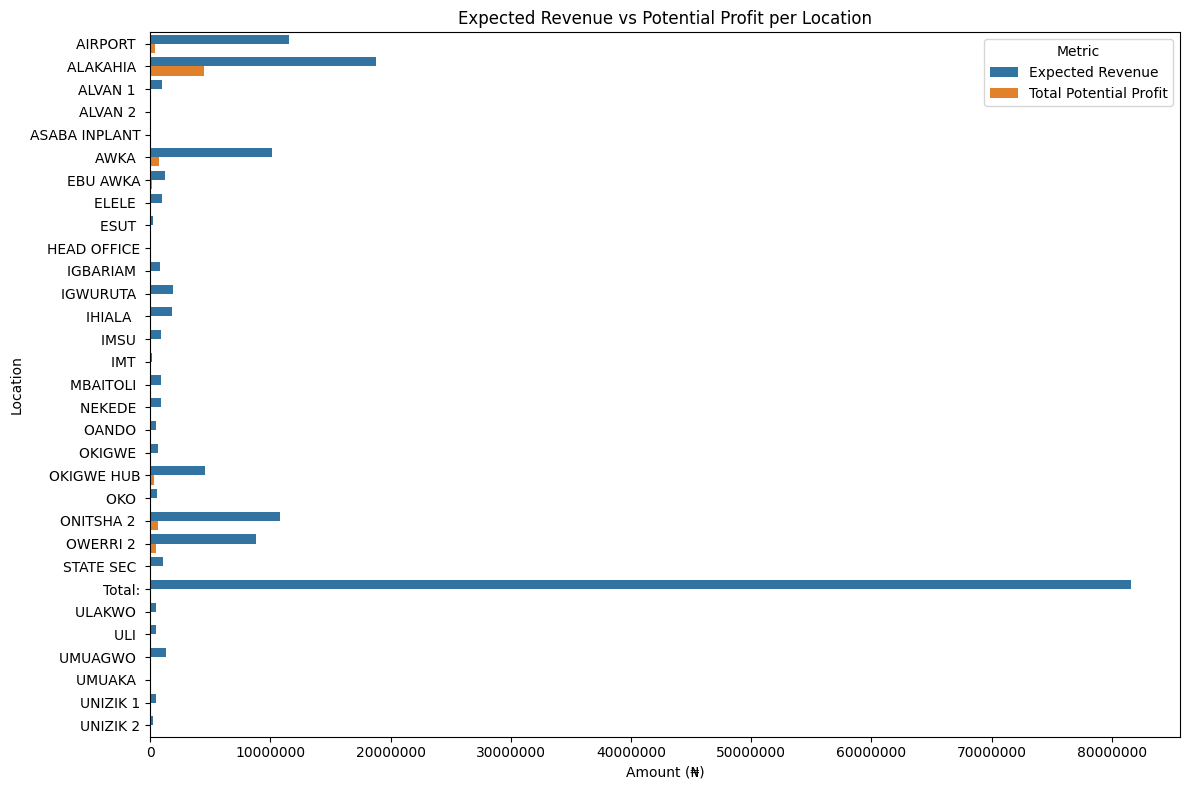

In [112]:
merged = pd.merge(revenue_per_location, profit_per_location, on='Location')

# Convert to long format for seaborn
melted = pd.melt(
    merged,
    id_vars='Location',
    value_vars=['Expected Revenue', 'Total Potential Profit'],
    var_name='Metric',
    value_name='Amount'
)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted, y='Location', x='Amount', hue='Metric', orient='h')

plt.title('Expected Revenue vs Potential Profit per Location')
plt.xlabel('Amount (₦)')
plt.ylabel('Location')
plt.ticklabel_format(style='plain', axis='x')  # Show full numbers on x-axis
plt.tight_layout()
plt.savefig('images/expected_revenue_vs_potential_profit.png')
plt.show()

In [113]:
expenses_to_profit = (total_expenses_sum / total_profit) * 100 if total_profit != 0 else 0
print(f"Percentage of Total Expenses to Total Profit: {expenses_to_profit:.2f}%")

Percentage of Total Expenses to Total Profit: 293.17%


In [ ]:
# Clean and convert 'Total Amount' to numeric
purchases['Total Amount'] = purchases['Total Amount'].replace(r'[^0-9.]+', '', regex=True)
purchases['Total Amount'] = pd.to_numeric(purchases['Total Amount'], errors='coerce')
purchases['Location'] = purchases['Location'].str.replace(r'CONNECT POINT|CONNECT\s*/\s*LITE| CONNECT LITE', '', regex=True)

# Strip extra spaces
purchases['Location'] = purchases['Location'].str.strip()
# Group by Location
purchase_total = purchases.groupby('Location')['Total Amount'].sum().reset_index()

# Rename column for clarity
purchase_total.rename(columns={'Total Amount': 'Total Purchase Amount'}, inplace=True)

# Output result
print(purchase_total.head(10))

# Print sum of all purchases
total_purchase_sum = purchase_total['Total Purchase Amount'].sum()

print(f"Total Purchase Amount: {total_purchase_sum}")

Total Purchase Amount: 303836106.27


: 

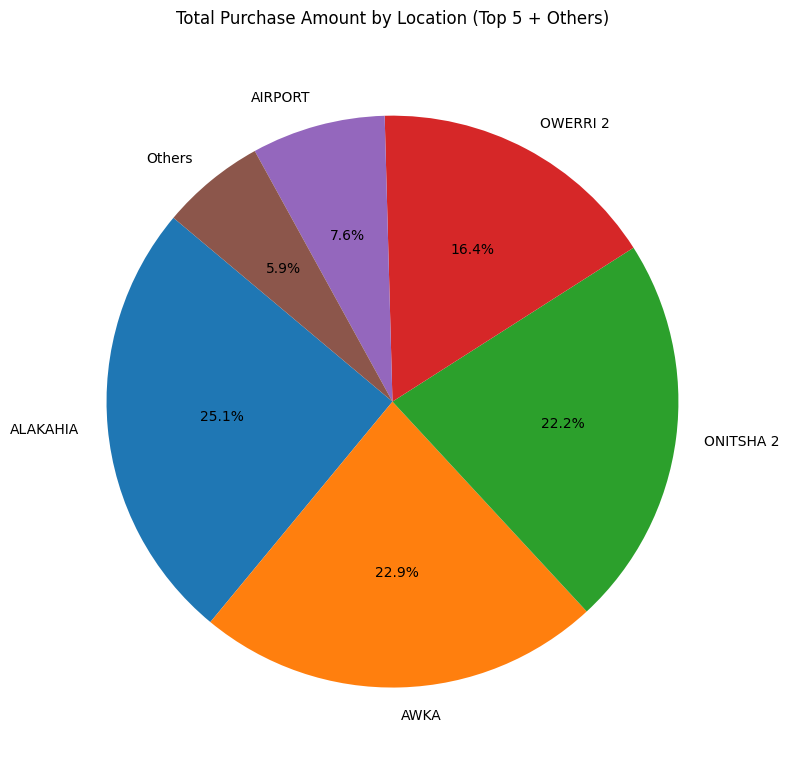

In [115]:
# Sort by Total Purchase Amount
purchase_total_sorted = purchase_total.sort_values('Total Purchase Amount', ascending=False)

# Get top 5
top5purchases = purchase_total_sorted.head(5)

# Get others by dropping top 5
others = purchase_total_sorted.iloc[5:]

# Calculate sum of others
others_sum = others['Total Purchase Amount'].sum()

# Combine top 5 and others
combined = top5purchases.copy()
combined.loc[len(combined)] = ['Others', others_sum]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined['Total Purchase Amount'], labels=combined['Location'], autopct='%1.1f%%', startangle=140)
plt.title('Total Purchase Amount by Location (Top 5 + Others)')
plt.axis('equal')
plt.tight_layout()
plt.savefig('images/Purchase_Amount_by_Location.png')
plt.show()


In [116]:
# Sales Dataset is good but there is no column to identify what items were sold 

In [117]:
sales['Total Paid'] = sales['Total Paid'].replace(r'[^0-9.]+', '', regex=True)
sales['Total Paid'] = pd.to_numeric(sales['Total Paid'], errors='coerce')
# Calculate the overall sales amount
total_sales = sales['Total Paid'].sum()
print(f"Total Sales Amount: {total_sales}")
# Calculate sales per location
sales_per_location = sales.groupby('Location')['Total Paid'].sum().reset_index()
sales_per_location.rename(columns={'Total Paid': 'Sales Amount'}, inplace=True)


Total Sales Amount: 275424455.25


In [118]:
# Percentage of Purchases + Expense to Sales
# Calculate the total purchases and expenses
total_purchases = purchases['Total Amount'].sum()
total_expenses = expenses['Total Amount'].sum()

# Calculate the percentage of purchases and expenses to sales
percentage_purchases = (total_purchases / total_sales) * 100 if total_sales != 0 else 0
print(f"Percentage of Purchases to Sales: {percentage_purchases:.2f}%")
percentage_expenses = (total_expenses / total_sales) * 100 if total_sales != 0 else 0
print(f"Percentage of Expenses to Sales: {percentage_expenses:.2f}%")


# Combined Expenses and Purchases to Sales
combined_expenses_purchases = total_expenses + total_purchases
percentage_combined = (combined_expenses_purchases / total_sales) * 100 if total_sales != 0 else 0
print(f"Percentage of Combined Expenses and Purchases to Sales: {percentage_combined:.2f}%")

Percentage of Purchases to Sales: 110.32%
Percentage of Expenses to Sales: 8.91%
Percentage of Combined Expenses and Purchases to Sales: 119.22%


In [119]:
# Ensure 'Total Items' is numeric
sales['Total Items'] = sales['Total Items'].replace(r'[^0-9.]+', '', regex=True)
sales['Total Items'] = pd.to_numeric(sales['Total Items'], errors='coerce')
sales['Location'] = sales['Location'].str.replace(r'CONNECT POINT|CONNECT\s*/\s*LITE| CONNECT LITE', '', regex=True)

# Group by Location
items_sold_total = sales.groupby('Location')['Total Items'].sum().reset_index()

# Rename column for clarity
items_sold_total.rename(columns={'Total Items': 'Total Items Sold'}, inplace=True)

# Output
print(items_sold_total.head(10))

print(f"Total Items Sold: {sales['Total Items'].sum()}")


      Location  Total Items Sold
0      AIRPORT               441
1     ALAKAHIA               813
2      ALVAN 1               570
3      ALVAN 2               297
4         AWKA              1384
5     EBU AWKA                64
6        ELELE               593
7         ESUT               348
8  HEAD OFFICE                50
9     IGBARIAM               464
Total Items Sold: 15220


C:\Users\bubut\AppData\Local\Temp\ipykernel_10484\1946221405.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set3')  # or 'tab20', 'Accent', etc.


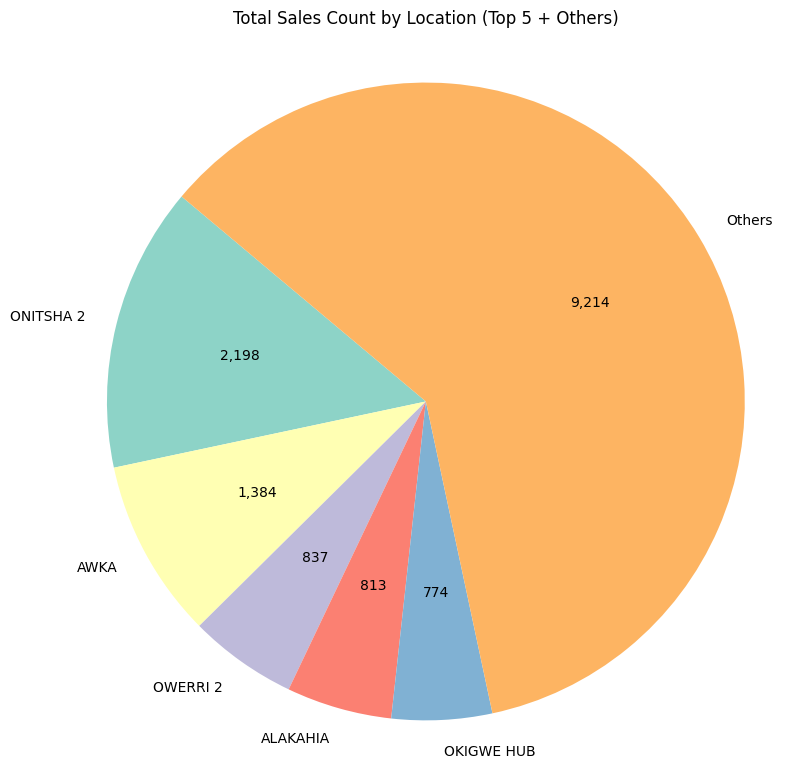

In [120]:
# Sort by Total Purchase Amount
items_total_sorted = items_sold_total.sort_values('Total Items Sold', ascending=False)

# Get top 5
top5saleslocations = items_total_sorted.head(5)

# Get others by dropping top 5
others = items_total_sorted.iloc[5:]

# Calculate sum of others
others_sum = others['Total Items Sold'].sum()

# Combine top 5 and others
combined = top5saleslocations.copy()
combined.loc[len(combined)] = ['Others', others_sum]

# Custom function to format labels as absolute values
def absolute_value(val):
    total = combined['Total Items Sold'].sum()
    absolute = int(round(val/100 * total))
    return f'{absolute:,}'

import matplotlib.cm as cm
# Choose a colormap (e.g., 'tab10', 'Set3', 'Pastel1', etc.)
cmap = cm.get_cmap('Set3')  # or 'tab20', 'Accent', etc.

# Generate N distinct colors based on the number of slices
colors = cmap(range(len(combined)))
# Plot pie chart with figures
plt.figure(figsize=(8, 8))
plt.pie(
    combined['Total Items Sold'], 
    labels=combined['Location'], 
    autopct=absolute_value, 
    startangle=140, colors=colors,
)
plt.title('Total Sales Count by Location (Top 5 + Others)')
plt.axis('equal')
plt.tight_layout()
plt.savefig('images/Items_Sales_Count_by_Location.png')
plt.show()


In [121]:
# Ensure date is in datetime format
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True, errors='coerce')

# Extract Year-Month for grouping
sales['Month'] = sales['Date'].dt.to_period('M').astype(str)

# Clean and convert numeric columns
sales['Total Items'] = sales['Total Items'].replace(r'[^0-9.]+', '', regex=True)
sales['Total Items'] = pd.to_numeric(sales['Total Items'], errors='coerce')

sales['Total Sales'] = sales['Total Paid'].replace(r'[^0-9.]+', '', regex=True)
sales['Total Sales'] = pd.to_numeric(sales['Total Paid'], errors='coerce')

# Group by Month
monthly_summary = sales.groupby('Month').agg({
    'Total Sales': 'sum',
    'Total Items': 'sum'
}).reset_index()

# Rename columns
monthly_summary.rename(columns={
    'Total Sales': 'Monthly Revenue',
    'Total Items': 'Items Sold'
}, inplace=True)

# Output
pd.set_option('display.float_format', '{:,.2f}'.format)
print(monthly_summary.head())  # Show a year's worth of data


     Month  Monthly Revenue  Items Sold
0  2025-01    54,079,130.25        3439
1  2025-02    66,087,765.00        3942
2  2025-03    77,491,575.00        3938
3  2025-04    77,765,985.00        3901


C:\Users\bubut\AppData\Local\Temp\ipykernel_10484\1395608584.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_summary['Month'], rotation=45)


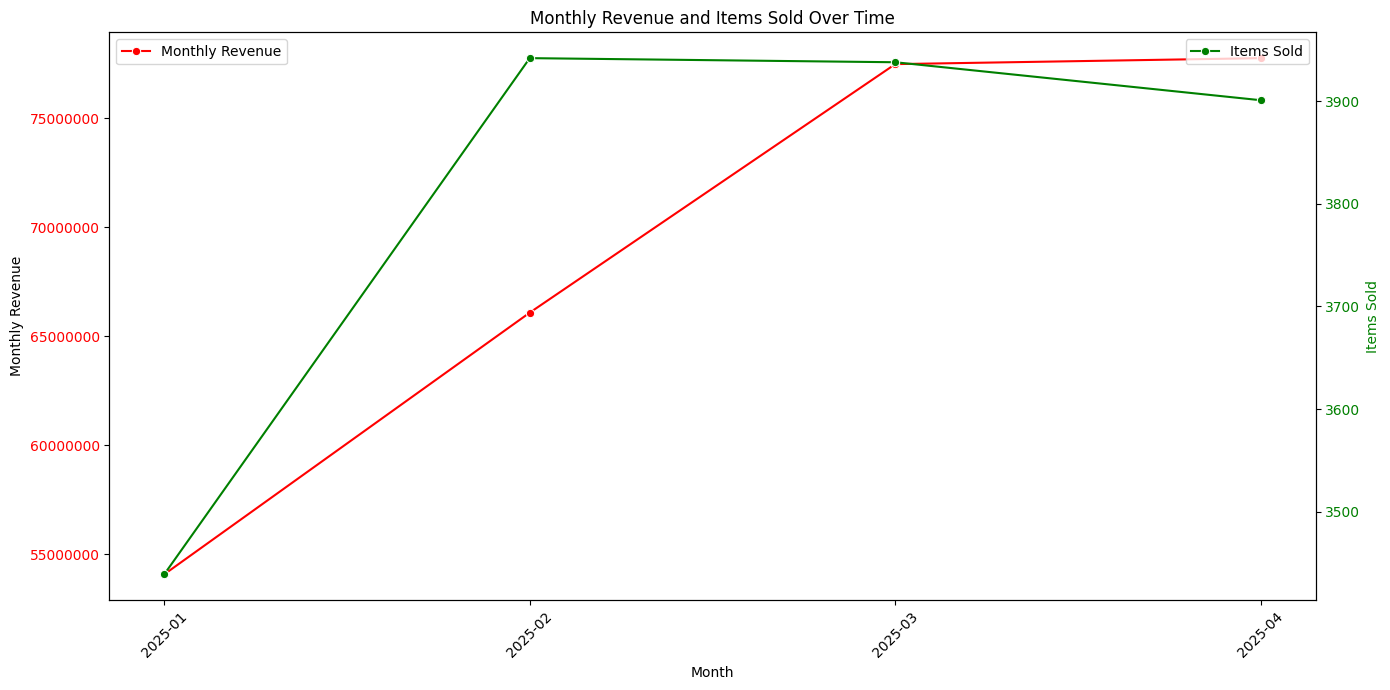

In [122]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Primary y-axis
sns.lineplot(data=monthly_summary, x='Month', y='Monthly Revenue', marker='o', label='Monthly Revenue', ax=ax1, color='red')
plt.ticklabel_format(style='plain', axis='y')  # Show full numbers on y-axis
ax1.set_ylabel('Monthly Revenue', color='black')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xlabel('Month')
ax1.set_xticklabels(monthly_summary['Month'], rotation=45)

# Secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=monthly_summary, x='Month', y='Items Sold', marker='o', label='Items Sold', ax=ax2, color='green')
ax2.set_ylabel('Items Sold', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Monthly Revenue and Items Sold Over Time')
fig.tight_layout()
plt.savefig('images/monthly_revenue_and_items_sold_dual_axis.png')
plt.show()


In [123]:
# Multiply salary by 3 to get Jan–March total
salaries['Q1_SALARY'] = salaries['SALARY'] * 3

# Group total salaries per location
total_salaries = salaries.groupby('LOCATION')['Q1_SALARY'].sum().reset_index()

# Clean and convert 'TOTAL' in CCR sales
ccr_sales['TOTAL'] = ccr_sales['TOTAL'].astype(str).str.replace(',', '')
ccr_sales['TOTAL'] = pd.to_numeric(ccr_sales['TOTAL'], errors='coerce')

# Group total sales per location
total_sales = ccr_sales.groupby('LOCATION')['TOTAL'].sum().reset_index()

# Merge both datasets on LOCATION
comparison = pd.merge(total_salaries, total_sales, on='LOCATION', how='inner')

# Calculate percentage of salary to sales
comparison['SALARY_AS_PERCENT_OF_SALES'] = (comparison['Q1_SALARY'] / comparison['TOTAL']) * 100

# Sort by percentage descending
top5SalToPercent = comparison.sort_values('SALARY_AS_PERCENT_OF_SALES', ascending=False).head(5)

# Display top 5
print(top5SalToPercent[['LOCATION', 'Q1_SALARY', 'TOTAL', 'SALARY_AS_PERCENT_OF_SALES']])



     LOCATION  Q1_SALARY        TOTAL  SALARY_AS_PERCENT_OF_SALES
6    IGBARIAM 180,000.00   957,850.00                       18.79
5        ESUT 120,000.00   685,800.00                       17.50
10        IMT 210,000.00 1,770,780.00                       11.86
17  STATE SEC 180,000.00 1,758,800.00                       10.23
20    UMUAGWO  90,000.00   965,300.00                        9.32


In [ ]:
# Ensure 'TOTAL' is numeric
ccr_sales['TOTAL'] = pd.to_numeric(ccr_sales['TOTAL'], errors='coerce')

# Get best performer per location
best = ccr_sales.loc[ccr_sales.groupby('LOCATION')['TOTAL'].idxmax()].copy()
best.rename(columns={'NAME': 'Best Performer', 'TOTAL': 'Best Sales Amount'}, inplace=True)

# Get worst performer per location
worst = ccr_sales.loc[ccr_sales.groupby('LOCATION')['TOTAL'].idxmin()].copy()
worst.rename(columns={'NAME': 'Worst Performer', 'TOTAL': 'Worst Sales Amount'}, inplace=True)

# Merge best and worst into one table
summary = pd.merge(
    best[['LOCATION', 'Best Performer', 'Best Sales Amount']],
    worst[['LOCATION', 'Worst Performer', 'Worst Sales Amount']],
    on='LOCATION'
)


# Optional: format sales amounts
summary['Best Sales Amount'] = summary['Best Sales Amount'].apply(lambda x: f"NGN {x:,.0f}")
summary['Worst Sales Amount'] = summary['Worst Sales Amount'].apply(lambda x: f"NGN {x:,.0f}")

# Rename LOCATION to Location for final output
summary.rename(columns={'LOCATION': 'Location'}, inplace=True)

# Display result
print(summary.to_string(index=False))



  Location          Best Performer Best Sales Amount         Worst Performer Worst Sales Amount
   AIRPORT           HENRY JOHNSON     NGN 1,816,100     OLACHI .R. CHIMEZIE        NGN 849,800
  ALAKAHIA           GLORIA DENNIS    NGN 21,098,600        BARINE NWIKABARI      NGN 4,298,500
    ALVAN1      CHIBUZO ONWUCHEKWA     NGN 2,057,500      CHIBUZO ONWUCHEKWA      NGN 2,057,500
    ALVAN2           EZINNE CHIEKE     NGN 1,020,400           EZINNE CHIEKE        NGN 325,950
      AWKA            RITA BERNARD     NGN 9,608,150          JULIET NGWAKWE      NGN 3,526,750
     ELELE         REJOICE JOHNSON     NGN 1,831,100       EMMANUEL EGBEIGWE        NGN 326,400
      ESUT      NWACHUKWU KINGSLEY       NGN 685,800      NWACHUKWU KINGSLEY        NGN 685,800
  IGBARIAM      UJU KENNETH UGONNA       NGN 615,950             JOHN OKAFOR        NGN 341,900
  IGWURUTA         EMMANUEL INYANG     NGN 1,879,600         EMMANUEL INYANG      NGN 1,879,600
    IHIALA      UGOCHUKWU SABINUS      N

C:\Users\bubut\AppData\Local\Temp\ipykernel_10484\850516293.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ccr_summary = ccr_sales.groupby('LOCATION').apply(


In [129]:
# Calculate Best and Worst CCRs by Location
ccr_summary = ccr_sales.groupby('LOCATION').apply(
    lambda x: pd.Series({
        'Best Performer': f"{x.loc[x['TOTAL'].idxmax(), 'NAME']}",
        'Best Sales Amount': x['TOTAL'].max(),
        'Worst Performer': f"{x.loc[x['TOTAL'].idxmin(), 'NAME']}",
        'Worst Sales Amount': x['TOTAL'].min(),
        'Note': 'Only one CCR' if len(x) == 1 else ''
    })
).reset_index()

# Optional: sort by Best Sales Amount descending
ccr_summary = ccr_summary.sort_values(by='Best Sales Amount', ascending=False)

# Display result
print(ccr_summary.to_string(index=False))


  LOCATION          Best Performer  Best Sales Amount         Worst Performer  Worst Sales Amount         Note
  ALAKAHIA           GLORIA DENNIS      21,098,600.00        BARINE NWIKABARI        4,298,500.00             
   OWERRI2         CHIMEZIE UNEGBU      15,999,600.00        CHIDINMA OGBONNA          991,500.00             
      AWKA            RITA BERNARD       9,608,150.00          JULIET NGWAKWE        3,526,750.00             
   ONITSHA          BRIGHT NWOKORO       8,576,200.00        IFEANYI IGWENAGU        1,279,400.00             
    IHIALA      UGOCHUKWU SABINUS        3,255,400.00      UGOCHUKWU SABINUS         3,255,400.00 Only one CCR
  MBAITOLI           ANYANWU DAVID       3,240,200.00          UKAEGBU STELLA          612,600.00             
    NEKEDE               PAUL AGWU       3,143,500.00               PAUL AGWU        3,143,500.00 Only one CCR
      IMSU         ODOEMENA VIVIAN       2,757,750.00        CHIDINMA OGBONNA           97,800.00             
 

C:\Users\bubut\AppData\Local\Temp\ipykernel_10484\1416727458.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ccr_summary = ccr_sales.groupby('LOCATION').apply(


In [125]:
# Replace datasets csvs with cleaned ones
sales.to_csv('cleaned/sales.csv', index=False)
products.to_csv('cleaned/products.csv', index=False)
purchases.to_csv('cleaned/purchases.csv', index=False)
expenses.to_csv('cleaned/expenses.csv', index=False)
salaries.to_csv('cleaned/salaries.csv', index=False)
ccr_sales.to_csv('cleaned/ccr_sales.csv', index=False)